In [39]:
import numpy as np

def solution(data):
    data = np.array(list(data.values()))
    def mean(data):
        data = data.T
        for _data in data:
            u = _data.mean()
        return u
    
    def euclidean(data):
        array = [[0 for _ in range(data.shape[0])] for _ in range(data.shape[0])]
        for i, data1 in enumerate(data):
            for j, data2 in enumerate(data):
                if i==j:
                    continue
                array[i][j]=np.sqrt(((data1-data2)**2).sum())
        return array
    
    def mahalanobis(data):
        m = mean(data)
        cov = ((data.T-m)**2).sum(axis=1)/data.T.shape[1]
        cov_mat = np.zeros((cov.shape[0],cov.shape[0]))
        for i,c in enumerate(cov):
            cov_mat[i,i]=c
        
        inv_cov_mat = np.linalg.inv(cov_mat)
        array = [[0 for _ in range(data.shape[0])] for _ in range(data.shape[0])]
        for i, data1 in enumerate(data):
            for j, data2 in enumerate(data):
                if i==j:
                    continue
                _data = data1-data2
                array[i][j] = np.sqrt(_data.dot(inv_cov_mat).dot(_data.T))
        return array
    euc_result = euclidean(data)
    mah_result = mahalanobis(data)
    return euc_result, mah_result
    #print(np.array(euclidean(data)))
        
def distance_compare(array):
    indexes = [i for i in range(len(array))]
    for i in range(len(array)):
        array[i][i]=float('INF')
    for current in indexes:
        nearest_index = np.argmin(array[current])
        nearest_distance = array[current][nearest_index]
        print("current_index : {}, nearest_index : {} -> {:.2f}".format(current, nearest_index,nearest_distance))
        
def print_distance(array):
    _str = ''
    for current in array:
        for c in current:
            #print(c)
            _str += ''.join('{:.2f}, '.format(c))
        print('['+_str[:-2] + ']')
        _str=''
        
data = {}
# height, weight, age, score
_data = [[170, 50.5, 29, 80],\
[172, 71.1, 33, 93],\
[167, 61.3, 37, 72],\
[180, 88.4, 44, 88],\
[188, 69.8, 46, 85],\
[162, 58.2, 35, 69]]
for idx, value in enumerate(_data):
    data[idx]=value

euc, mah = solution(data)
print('euclidian distance array')
print_distance(euc)
print()
print('mahalanobis distance array')
print_distance(mah)
print()
print('euclidian distance compare')
distance_compare(euc)
print()
print('mahalanobis distance compare')
distance_compare(mah)

euclidian distance array
[0.00, 24.77, 15.93, 42.72, 31.79, 16.74]
[24.77, 0.00, 24.04, 22.57, 22.15, 29.09]
[15.93, 24.04, 0.00, 34.76, 27.63, 6.90]
[42.72, 22.57, 34.76, 0.00, 20.57, 40.96]
[31.79, 22.15, 27.63, 20.57, 0.00, 34.46]
[16.74, 29.09, 6.90, 40.96, 34.46, 0.00]

mahalanobis distance array
[0.00, 1.88, 1.11, 2.24, 1.25, 1.36]
[1.88, 0.00, 2.52, 1.12, 1.00, 2.90]
[1.11, 2.52, 0.00, 2.37, 1.62, 0.40]
[2.24, 1.12, 2.37, 0.00, 1.05, 2.76]
[1.25, 1.00, 1.62, 1.05, 0.00, 2.01]
[1.36, 2.90, 0.40, 2.76, 2.01, 0.00]

euclidian distance compare
current_index : 0, nearest_index : 2 -> 15.93
current_index : 1, nearest_index : 4 -> 22.15
current_index : 2, nearest_index : 5 -> 6.90
current_index : 3, nearest_index : 4 -> 20.57
current_index : 4, nearest_index : 3 -> 20.57
current_index : 5, nearest_index : 2 -> 6.90

mahalanobis distance compare
current_index : 0, nearest_index : 2 -> 1.11
current_index : 1, nearest_index : 4 -> 1.00
current_index : 2, nearest_index : 5 -> 0.40
current_

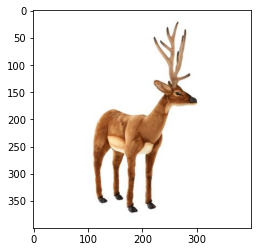

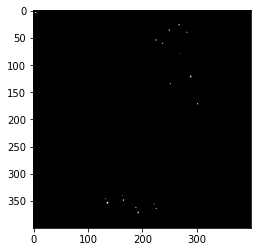

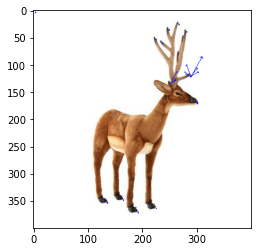

In [32]:
import numpy as np
import cv2
from PIL import Image
import copy
import matplotlib.pyplot as plt

def plot_arrowline(image, dic):
    color = (0,0,255)
    height,width,_ = image.shape
    result = copy.deepcopy(image)
    for position, (angle, mag) in dic.items():
        p1 = position
        dx = max(0,(position[1]+(mag*np.cos(np.radians(angle)))).astype('int'))
        dx = min(width,dx)
        dy = max(0,(position[0]+(-mag*np.sin(np.radians(angle)))).astype('int'))
        dy = min(height,dy)
        #print(angle, np.cos(np.radians(angle)),np.sin(np.radians(angle)))
        p2 = (dy, dx)
        cv2.arrowedLine(result, p1, p2, color, thickness=1)
    return result
    
    
def solution2(image):
    def gaussian(k,mean = 0, std=1):
        if k%2==0:
            raise Exception('짝수 X')
        size = (k,k)
        gauss_filter = np.zeros(size)
        mid = (k-1)//2

        # mean = 0 이라 가정

        for i in range(k):
            for j in range(k):
                gauss_filter[i,j] = np.exp(-((((i-mid)**2) + ((j-mid)**2))/(2*(std**2))))
        K = gauss_filter.sum()

        return gauss_filter/K

    def filtering(img, _filter):
        height, width = img.shape
        result = np.zeros(img.shape)
        k,_ = _filter.shape
        img = np.pad(img, ((k//2+1,k//2+1),(k//2+1,k//2+1)), 'constant', constant_values=0)
        for i in range(height):
            for j in range(width):
                result[i,j] = (img[i:i+k, j:j+k]  * _filter).sum()
        return result
    
    def harris(image,K=0.04, threshold=250):
        if len(image.shape)==3:
            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        height, width = image.shape
        filter_size = 3
        weight = gaussian(filter_size)
        image = image/255.
        dx_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        dy_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        
        dydy = np.zeros(image.shape)
        dydx = np.zeros(image.shape)
        dxdx = np.zeros(image.shape)
        
        #image = np.pad(image, ((1,1),(1,1)), 'constant', constant_values=0)
        #image= filtering(image,weight)
        dxdx = filtering(filtering(filtering(image,dx_filter),dx_filter),weight)
        dydx = filtering(filtering(filtering(image,dy_filter),dx_filter),weight)
        dydy = filtering(filtering(filtering(image,dy_filter),dy_filter),weight)
        
        result = np.zeros((height,width))
        offset = filter_size//2
        for i in range(offset, height-offset):
            for j in range(offset, width-offset):
                p = (dydy[i-offset:i+offset+1,j-offset:j+offset+1]).sum()
                r = (dydx[i-offset:i+offset+1,j-offset:j+offset+1]).sum()
                q = (dxdx[i-offset:i+offset+1,j-offset:j+offset+1]).sum()
                det = (p*q) - (r**2)
                trace = p+q
                C = det - K*(trace**2)
                if C>threshold:
                    #print(C)
                    result[i,j]=255
        corner_index = np.where(result==255)    
        plt.imshow(result,cmap='gray')
        plt.show()
        return list(zip(corner_index[1], corner_index[0]))

    def SIFT_orientation(image, corner_positions, sigma=1):
        if len(image.shape)==3:
            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        height, width = image.shape
        
        weight = gaussian(3)
        
        dx_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        dy_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        
        ## gaussian * image
        
        image = filtering(image,weight)
        
        
        ## mag,orient
        dic = {(position):None for position in corner_positions}
        keys = [i for i in range(0,360,10)]
                
        dy_map = filtering(image, dy_filter)
        dx_map = filtering(image, dx_filter)
        for i in range(height):
            for j in range(width):
                if (i,j) in dic:
                    dic[(i,j)] = {i:0 for i in range(0,360,10)}
                    mag = np.sqrt(dy_map[i,j]**2 + dx_map[i,j]**2)
                    orient = np.arctan(dy_map[i,j]/(dx_map[i,j]+1e-8))
                    #print(orient,(orient*180/np.pi)+180)
                    orient = (orient*180/np.pi)+180
                    
                    for k in range(0,len(keys)-1):
                        if keys[k]< orient < keys[k+1]:
                            if orient>(keys[k]+keys[k+1])/2:
                                dic[(i,j)][keys[k+1]]+=mag
                            else:
                                dic[(i,j)][keys[k]]+=mag
    
        result = {}
        for position, value in dic.items():
            _max = 0
            major_orientation = 0
            for angle, mag in value.items():
                if _max<mag:
                    _max = mag
                    major_orientation = angle
            result[position]=(major_orientation,_max)
        return result
        
    corner_positions = harris(image)
    result = SIFT_orientation(image, corner_positions)
    return result


    
#img = np.array(Image.open('temp.png')).astype('uint8')
img = cv2.imread('tt1.jpg', cv2.IMREAD_COLOR)
#img = cv2.imread('lena.bmp', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
histogram = solution2(img)
result = plot_arrowline(img, histogram)
plt.imshow(result)
plt.show()

In [31]:
import copy

[[-1,-2,-1],[0,0,0],[1,2,1]]

a = np.array([[-1],[0],[1]])
b = np.array([[1,1,1]])
print(a.dot(b))

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
